In [3]:
# =============================================================================
# 📓 NOTEBOOK 01: DATA CLEANING & PREPARATION
# =============================================================================
# Project: Retail Predictive Analytics Suite
# Author: [Your Name]
# Date: 2024
# =============================================================================

# =============================================================================
# CELL 1: IMPORT LIBRARIES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Visual style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"📅 Analysis Date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

✅ Libraries imported successfully!
📅 Analysis Date: 2026-02-11 12:49


In [4]:
df_raw = pd.read_csv('../data/raw/online_retail_II.csv')

print("=" * 60)
print("📊 DATASET LOADED SUCCESSFULLY")
print("=" * 60)
print(f"\n📁 Dataset: {df_raw.shape[0]:,} rows, {df_raw.shape[1]} columns")


📊 DATASET LOADED SUCCESSFULLY

📁 Dataset: 1,067,371 rows, 8 columns


In [5]:
# =============================================================================
# CELL 3: INITIAL DATA EXPLORATION
# =============================================================================

print("=" * 60)
print("🔍 INITIAL DATA EXPLORATION")
print("=" * 60)

# Display first few rows
print("\n📋 First 5 Rows:")
print("-" * 60)
display(df_raw.head())

# Column information
print("\n📋 Column Names & Data Types:")
print("-" * 60)
print(df_raw.dtypes)

# Basic statistics
print("\n📊 Basic Statistics:")
print("-" * 60)
display(df_raw.describe())

🔍 INITIAL DATA EXPLORATION

📋 First 5 Rows:
------------------------------------------------------------


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom



📋 Column Names & Data Types:
------------------------------------------------------------
Invoice            str
StockCode          str
Description        str
Quantity         int64
InvoiceDate        str
Price          float64
Customer ID    float64
Country            str
dtype: object

📊 Basic Statistics:
------------------------------------------------------------


,Quantity,Price,Customer ID
count,1067371.00,1067371.00,824364.00
mean,9.94,4.65,15324.64
std,172.71,123.55,1697.46
min,-80995.00,-53594.36,12346.00
25%,1.00,1.25,13975.00
50%,3.00,2.10,15255.00
75%,10.00,4.15,16797.00
max,80995.00,38970.00,18287.00


❌ MISSING VALUES ANALYSIS

📊 Missing Values Summary:


,Column,Missing Count,Missing %,Data Type
6,Customer ID,243007,22.77,float64
2,Description,4382,0.41,str
1,StockCode,0,0.00,str
0,Invoice,0,0.00,str
3,Quantity,0,0.00,int64
4,InvoiceDate,0,0.00,str
5,Price,0,0.00,float64
7,Country,0,0.00,str


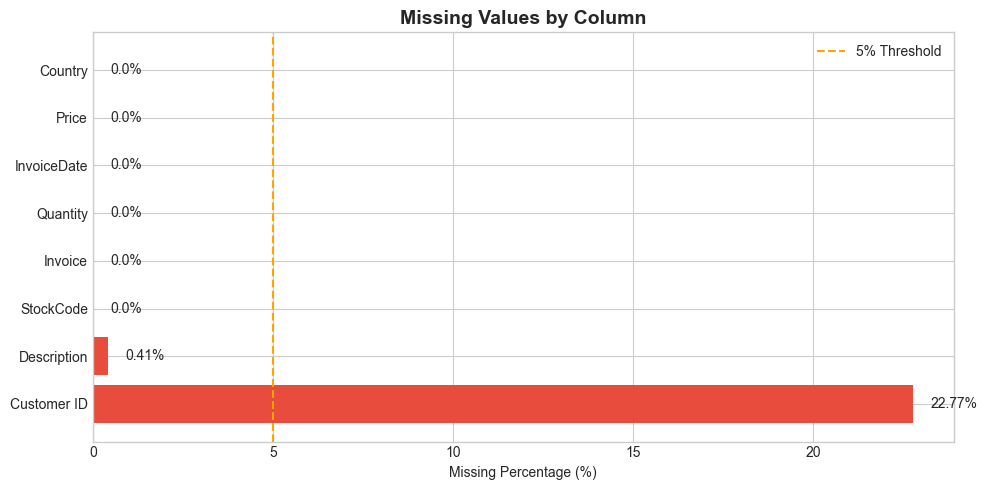


💾 Plot saved: outputs/missing_values.png


In [6]:
# =============================================================================
# CELL 4: MISSING VALUES ANALYSIS
# =============================================================================

print("=" * 60)
print("❌ MISSING VALUES ANALYSIS")
print("=" * 60)

# Calculate missing values
missing_df = pd.DataFrame({
    'Column': df_raw.columns,
    'Missing Count': df_raw.isnull().sum().values,
    'Missing %': (df_raw.isnull().sum().values / len(df_raw) * 100).round(2),
    'Data Type': df_raw.dtypes.values
})

missing_df = missing_df.sort_values('Missing %', ascending=False)
print("\n📊 Missing Values Summary:")
display(missing_df)

# Visualize missing values
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['#e74c3c' if x > 0 else '#2ecc71' for x in missing_df['Missing %']]
bars = ax.barh(missing_df['Column'], missing_df['Missing %'], color=colors)
ax.set_xlabel('Missing Percentage (%)')
ax.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
ax.axvline(x=5, color='orange', linestyle='--', label='5% Threshold')
ax.legend()

# Add value labels
for bar, val in zip(bars, missing_df['Missing %']):
    ax.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
            f'{val}%', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('../outputs/missing_values.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💾 Plot saved: outputs/missing_values.png")

In [7]:
# =============================================================================
# CELL 5: DATA QUALITY CHECKS
# =============================================================================

print("=" * 60)
print("🔎 DATA QUALITY CHECKS")
print("=" * 60)

# Check for duplicates
duplicates = df_raw.duplicated().sum()
print(f"\n📌 Duplicate Rows: {duplicates:,} ({duplicates/len(df_raw)*100:.2f}%)")

# Check Invoice patterns
print(f"\n📌 Unique Invoices: {df_raw['Invoice'].nunique():,}")
print(f"📌 Unique Products (StockCode): {df_raw['StockCode'].nunique():,}")
print(f"📌 Unique Customers: {df_raw['Customer ID'].nunique():,}")
print(f"📌 Unique Countries: {df_raw['Country'].nunique()}")

# Date range
print(f"\n📅 Date Range:")
print(f"   Start: {df_raw['InvoiceDate'].min()}")
print(f"   End: {df_raw['InvoiceDate'].max()}")

# Check for negative quantities (returns)
negative_qty = (df_raw['Quantity'] < 0).sum()
print(f"\n📌 Negative Quantities (Returns): {negative_qty:,} ({negative_qty/len(df_raw)*100:.2f}%)")

# Check for zero/negative prices
zero_price = (df_raw['Price'] <= 0).sum()
print(f"📌 Zero/Negative Prices: {zero_price:,} ({zero_price/len(df_raw)*100:.2f}%)")

# Cancelled orders (Invoice starts with 'C')
cancelled = df_raw['Invoice'].astype(str).str.startswith('C').sum()
print(f"📌 Cancelled Orders: {cancelled:,} ({cancelled/len(df_raw)*100:.2f}%)")

🔎 DATA QUALITY CHECKS

📌 Duplicate Rows: 34,335 (3.22%)

📌 Unique Invoices: 53,628
📌 Unique Products (StockCode): 5,305
📌 Unique Customers: 5,942
📌 Unique Countries: 43

📅 Date Range:
   Start: 2009-12-01 07:45:00
   End: 2011-12-09 12:50:00

📌 Negative Quantities (Returns): 22,950 (2.15%)
📌 Zero/Negative Prices: 6,207 (0.58%)
📌 Cancelled Orders: 19,494 (1.83%)


In [8]:
# =============================================================================
# CELL 6: DATA CLEANING - STEP BY STEP
# =============================================================================

print("=" * 60)
print("🧹 DATA CLEANING PROCESS")
print("=" * 60)

# Create a copy for cleaning
df = df_raw.copy()
initial_rows = len(df)

print(f"\n📊 Initial Dataset: {initial_rows:,} rows")
print("-" * 60)

# -----------------------------------------------------------------------------
# STEP 1: Remove rows with missing Customer ID
# -----------------------------------------------------------------------------
df = df.dropna(subset=['Customer ID'])
step1_rows = len(df)
removed1 = initial_rows - step1_rows
print(f"✅ Step 1: Removed missing Customer ID → {removed1:,} rows removed")
print(f"   Remaining: {step1_rows:,} rows")

# -----------------------------------------------------------------------------
# STEP 2: Remove cancelled orders (Invoice starts with 'C')
# -----------------------------------------------------------------------------
df = df[~df['Invoice'].astype(str).str.startswith('C')]
step2_rows = len(df)
removed2 = step1_rows - step2_rows
print(f"✅ Step 2: Removed cancelled orders → {removed2:,} rows removed")
print(f"   Remaining: {step2_rows:,} rows")

# -----------------------------------------------------------------------------
# STEP 3: Remove negative quantities
# -----------------------------------------------------------------------------
df = df[df['Quantity'] > 0]
step3_rows = len(df)
removed3 = step2_rows - step3_rows
print(f"✅ Step 3: Removed negative quantities → {removed3:,} rows removed")
print(f"   Remaining: {step3_rows:,} rows")

# -----------------------------------------------------------------------------
# STEP 4: Remove zero/negative prices
# -----------------------------------------------------------------------------
df = df[df['Price'] > 0]
step4_rows = len(df)
removed4 = step3_rows - step4_rows
print(f"✅ Step 4: Removed zero/negative prices → {removed4:,} rows removed")
print(f"   Remaining: {step4_rows:,} rows")

# -----------------------------------------------------------------------------
# STEP 5: Remove duplicates
# -----------------------------------------------------------------------------
df = df.drop_duplicates()
step5_rows = len(df)
removed5 = step4_rows - step5_rows
print(f"✅ Step 5: Removed duplicates → {removed5:,} rows removed")
print(f"   Remaining: {step5_rows:,} rows")

# -----------------------------------------------------------------------------
# SUMMARY
# -----------------------------------------------------------------------------
total_removed = initial_rows - step5_rows
print("\n" + "=" * 60)
print(f"📊 CLEANING SUMMARY")
print("=" * 60)
print(f"   Initial Rows: {initial_rows:,}")
print(f"   Final Rows: {step5_rows:,}")
print(f"   Total Removed: {total_removed:,} ({total_removed/initial_rows*100:.1f}%)")
print(f"   Data Retained: {step5_rows/initial_rows*100:.1f}%")

🧹 DATA CLEANING PROCESS

📊 Initial Dataset: 1,067,371 rows
------------------------------------------------------------
✅ Step 1: Removed missing Customer ID → 243,007 rows removed
   Remaining: 824,364 rows
✅ Step 2: Removed cancelled orders → 18,744 rows removed
   Remaining: 805,620 rows
✅ Step 3: Removed negative quantities → 0 rows removed
   Remaining: 805,620 rows
✅ Step 4: Removed zero/negative prices → 71 rows removed
   Remaining: 805,549 rows
✅ Step 5: Removed duplicates → 26,124 rows removed
   Remaining: 779,425 rows

📊 CLEANING SUMMARY
   Initial Rows: 1,067,371
   Final Rows: 779,425
   Total Removed: 287,946 (27.0%)
   Data Retained: 73.0%


In [9]:
# =============================================================================
# CELL 7: FEATURE ENGINEERING
# =============================================================================

print("=" * 60)
print("⚙️ FEATURE ENGINEERING")
print("=" * 60)

# -----------------------------------------------------------------------------
# Create Revenue column
# -----------------------------------------------------------------------------
df['Revenue'] = df['Quantity'] * df['Price']
print("✅ Created: Revenue = Quantity × Price")

# -----------------------------------------------------------------------------
# Extract date components
# -----------------------------------------------------------------------------
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour
df['YearMonth'] = df['InvoiceDate'].dt.to_period('M')

print("✅ Extracted: Year, Month, Day, DayOfWeek, Hour, YearMonth")

# -----------------------------------------------------------------------------
# Day name mapping
# -----------------------------------------------------------------------------
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 
             3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['DayName'] = df['DayOfWeek'].map(day_names)
print("✅ Created: DayName")

# -----------------------------------------------------------------------------
# Convert Customer ID to integer
# -----------------------------------------------------------------------------
df['Customer ID'] = df['Customer ID'].astype(int)
print("✅ Converted: Customer ID to integer")

# Display new columns
print("\n📋 Final Columns:")
print("-" * 60)
print(df.dtypes)

⚙️ FEATURE ENGINEERING
✅ Created: Revenue = Quantity × Price
✅ Extracted: Year, Month, Day, DayOfWeek, Hour, YearMonth
✅ Created: DayName
✅ Converted: Customer ID to integer

📋 Final Columns:
------------------------------------------------------------
Invoice                   str
StockCode                 str
Description               str
Quantity                int64
InvoiceDate    datetime64[us]
Price                 float64
Customer ID             int64
Country                   str
Revenue               float64
Year                    int32
Month                   int32
Day                     int32
DayOfWeek               int32
Hour                    int32
YearMonth           period[M]
DayName                   str
dtype: object


In [10]:
# =============================================================================
# CELL 8: FINAL DATA VALIDATION
# =============================================================================

print("=" * 60)
print("✅ FINAL DATA VALIDATION")
print("=" * 60)

# Check for any remaining issues
print("\n📊 Final Dataset Overview:")
print("-" * 60)
print(f"   Rows: {len(df):,}")
print(f"   Columns: {len(df.columns)}")
print(f"   Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n📊 Missing Values Check:")
print("-" * 60)
print(df.isnull().sum())

print("\n📊 Data Ranges:")
print("-" * 60)
print(f"   Quantity: {df['Quantity'].min()} to {df['Quantity'].max()}")
print(f"   Price: £{df['Price'].min():.2f} to £{df['Price'].max():.2f}")
print(f"   Revenue: £{df['Revenue'].min():.2f} to £{df['Revenue'].max():.2f}")

print("\n📊 Date Range:")
print("-" * 60)
print(f"   From: {df['InvoiceDate'].min()}")
print(f"   To: {df['InvoiceDate'].max()}")

print("\n📊 Unique Values:")
print("-" * 60)
print(f"   Customers: {df['Customer ID'].nunique():,}")
print(f"   Invoices: {df['Invoice'].nunique():,}")
print(f"   Products: {df['StockCode'].nunique():,}")
print(f"   Countries: {df['Country'].nunique()}")

✅ FINAL DATA VALIDATION

📊 Final Dataset Overview:
------------------------------------------------------------
   Rows: 779,425
   Columns: 16
   Memory Usage: 281.83 MB

📊 Missing Values Check:
------------------------------------------------------------
Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
Revenue        0
Year           0
Month          0
Day            0
DayOfWeek      0
Hour           0
YearMonth      0
DayName        0
dtype: int64

📊 Data Ranges:
------------------------------------------------------------
   Quantity: 1 to 80995
   Price: £0.00 to £10953.50
   Revenue: £0.00 to £168469.60

📊 Date Range:
------------------------------------------------------------
   From: 2009-12-01 07:45:00
   To: 2011-12-09 12:50:00

📊 Unique Values:
------------------------------------------------------------
   Customers: 5,878
   Invoices: 36,969
   Products: 4,631
   Countries: 41


In [11]:
# =============================================================================
# CELL 9: SAMPLE DATA DISPLAY
# =============================================================================

print("=" * 60)
print("📋 SAMPLE OF CLEANED DATA")
print("=" * 60)

display(df.head(10))

print("\n📊 Statistical Summary:")
display(df[['Quantity', 'Price', 'Revenue']].describe())

📋 SAMPLE OF CLEANED DATA


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Revenue,Year,Month,Day,DayOfWeek,Hour,YearMonth,DayName
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085,United Kingdom,83.40,2009,12,1,1,7,2009-12,Tuesday
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12,1,1,7,2009-12,Tuesday
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085,United Kingdom,81.00,2009,12,1,1,7,2009-12,Tuesday
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085,United Kingdom,100.80,2009,12,1,1,7,2009-12,Tuesday
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12,1,1,7,2009-12,Tuesday
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085,United Kingdom,39.60,2009,12,1,1,7,2009-12,Tuesday
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085,United Kingdom,30.00,2009,12,1,1,7,2009-12,Tuesday
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085,United Kingdom,59.50,2009,12,1,1,7,2009-12,Tuesday
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085,United Kingdom,30.60,2009,12,1,1,7,2009-12,Tuesday
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085,United Kingdom,45.00,2009,12,1,1,7,2009-12,Tuesday



📊 Statistical Summary:


,Quantity,Price,Revenue
count,779425.00,779425.00,779425.00
mean,13.49,3.22,22.29
std,145.86,29.68,227.43
min,1.00,0.00,0.00
25%,2.00,1.25,4.95
50%,6.00,1.95,12.48
75%,12.00,3.75,19.80
max,80995.00,10953.50,168469.60


In [12]:
# =============================================================================
# CELL 10: SAVE CLEANED DATA
# =============================================================================

print("=" * 60)
print("💾 SAVING CLEANED DATA")
print("=" * 60)

# Save main cleaned dataset
df.to_csv('../data/processed/clean_retail.csv', index=False)
print("✅ Saved: data/processed/clean_retail.csv")

# Create and save monthly aggregated sales (for forecasting)
monthly_sales = df.groupby('YearMonth').agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Invoice': 'nunique',
    'Customer ID': 'nunique'
}).reset_index()

monthly_sales.columns = ['YearMonth', 'TotalRevenue', 'TotalQuantity', 
                          'TotalInvoices', 'UniqueCustomers']
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

monthly_sales.to_csv('../data/processed/monthly_sales.csv', index=False)
print("✅ Saved: data/processed/monthly_sales.csv")

# Create daily aggregated sales
daily_sales = df.groupby(df['InvoiceDate'].dt.date).agg({
    'Revenue': 'sum',
    'Quantity': 'sum',
    'Invoice': 'nunique',
    'Customer ID': 'nunique'
}).reset_index()

daily_sales.columns = ['Date', 'TotalRevenue', 'TotalQuantity', 
                        'TotalInvoices', 'UniqueCustomers']

daily_sales.to_csv('../data/processed/daily_sales.csv', index=False)
print("✅ Saved: data/processed/daily_sales.csv")

print("\n" + "=" * 60)
print("🎉 DATA CLEANING COMPLETE!")
print("=" * 60)

💾 SAVING CLEANED DATA
✅ Saved: data/processed/clean_retail.csv
✅ Saved: data/processed/monthly_sales.csv
✅ Saved: data/processed/daily_sales.csv

🎉 DATA CLEANING COMPLETE!


📊 CLEANING PROCESS VISUALIZATION


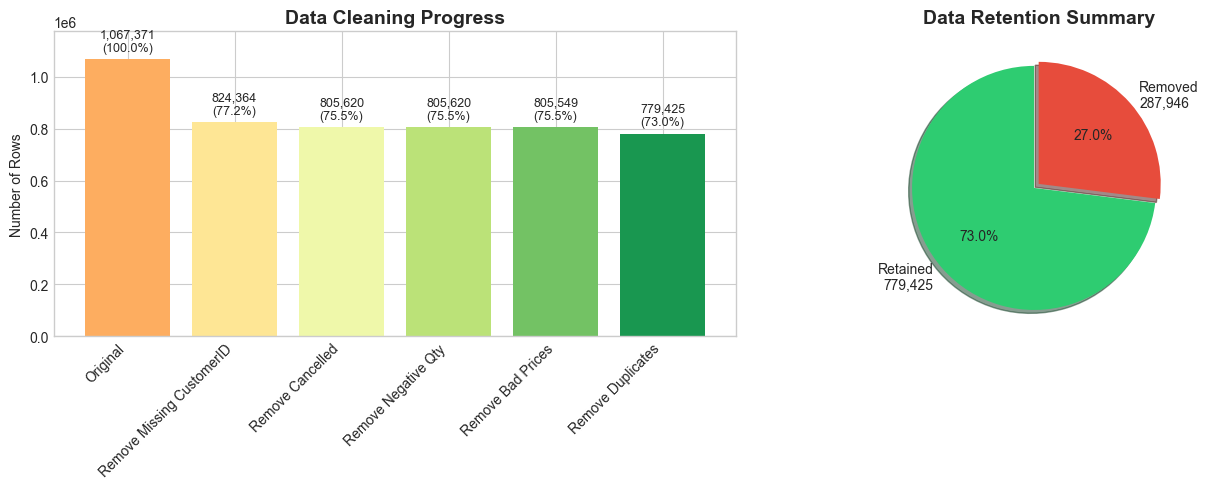


💾 Plot saved: outputs/cleaning_summary.png

📊 Cleaning Steps Summary:


,Step,Rows,Removed,Retained %
0,Original,1067371,0,100.00
1,Remove Missing CustomerID,824364,243007,77.20
2,Remove Cancelled,805620,18744,75.50
3,Remove Negative Qty,805620,0,75.50
4,Remove Bad Prices,805549,71,75.50
5,Remove Duplicates,779425,26124,73.00


In [13]:
# =============================================================================
# CELL 11: CLEANING SUMMARY VISUALIZATION
# =============================================================================

print("=" * 60)
print("📊 CLEANING PROCESS VISUALIZATION")
print("=" * 60)

# Create summary dataframe
cleaning_steps = pd.DataFrame({
    'Step': ['Original', 'Remove Missing CustomerID', 'Remove Cancelled', 
             'Remove Negative Qty', 'Remove Bad Prices', 'Remove Duplicates'],
    'Rows': [initial_rows, step1_rows, step2_rows, step3_rows, step4_rows, step5_rows]
})

cleaning_steps['Removed'] = cleaning_steps['Rows'].diff().fillna(0).abs().astype(int)
cleaning_steps['Retained %'] = (cleaning_steps['Rows'] / initial_rows * 100).round(1)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Rows at each step
ax1 = axes[0]
colors = plt.cm.RdYlGn(np.linspace(0.3, 0.9, len(cleaning_steps)))
bars = ax1.bar(range(len(cleaning_steps)), cleaning_steps['Rows'], color=colors)
ax1.set_xticks(range(len(cleaning_steps)))
ax1.set_xticklabels(cleaning_steps['Step'], rotation=45, ha='right')
ax1.set_ylabel('Number of Rows')
ax1.set_title('Data Cleaning Progress', fontsize=14, fontweight='bold')
ax1.set_ylim(0, initial_rows * 1.1)

# Add value labels
for bar, val, pct in zip(bars, cleaning_steps['Rows'], cleaning_steps['Retained %']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + initial_rows*0.02, 
             f'{val:,}\n({pct}%)', ha='center', va='bottom', fontsize=9)

# Plot 2: Pie chart of final composition
ax2 = axes[1]
sizes = [step5_rows, total_removed]
labels = [f'Retained\n{step5_rows:,}', f'Removed\n{total_removed:,}']
colors_pie = ['#2ecc71', '#e74c3c']
explode = (0.05, 0)

ax2.pie(sizes, explode=explode, labels=labels, colors=colors_pie,
        autopct='%1.1f%%', shadow=True, startangle=90)
ax2.set_title('Data Retention Summary', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../outputs/cleaning_summary.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n💾 Plot saved: outputs/cleaning_summary.png")

# Display summary table
print("\n📊 Cleaning Steps Summary:")
display(cleaning_steps)

In [14]:
# =============================================================================
# CELL 12: FINAL REPORT
# =============================================================================

print("=" * 70)
print("📝 NOTEBOOK 01 - FINAL REPORT")
print("=" * 70)

report = f"""
┌─────────────────────────────────────────────────────────────────────┐
│                    DATA CLEANING SUMMARY                            │
├─────────────────────────────────────────────────────────────────────┤
│  📁 Input File: online_retail_II.xlsx                               │
│  📁 Output Files:                                                   │
│     • clean_retail.csv ({len(df):,} rows)                      │
│     • monthly_sales.csv ({len(monthly_sales)} rows)                           │
│     • daily_sales.csv ({len(daily_sales)} rows)                            │
├─────────────────────────────────────────────────────────────────────┤
│  📊 Data Quality Metrics:                                           │
│     • Initial Rows: {initial_rows:,}                                    │
│     • Final Rows: {step5_rows:,}                                      │
│     • Rows Removed: {total_removed:,} ({total_removed/initial_rows*100:.1f}%)                         │
│     • Data Retained: {step5_rows/initial_rows*100:.1f}%                                        │
├─────────────────────────────────────────────────────────────────────┤
│  📊 Dataset Statistics:                                             │
│     • Unique Customers: {df['Customer ID'].nunique():,}                                  │
│     • Unique Invoices: {df['Invoice'].nunique():,}                                   │
│     • Unique Products: {df['StockCode'].nunique():,}                                    │
│     • Countries: {df['Country'].nunique()}                                             │
│     • Date Range: {df['InvoiceDate'].min().strftime('%Y-%m-%d')} to {df['InvoiceDate'].max().strftime('%Y-%m-%d')}              │
├─────────────────────────────────────────────────────────────────────┤
│  💰 Revenue Statistics:                                             │
│     • Total Revenue: £{df['Revenue'].sum():,.2f}                         │
│     • Average Order Value: £{df.groupby('Invoice')['Revenue'].sum().mean():,.2f}                           │
│     • Average Item Price: £{df['Price'].mean():,.2f}                               │
└─────────────────────────────────────────────────────────────────────┘

✅ Ready for Notebook 02: Exploratory Data Analysis
"""

print(report)

📝 NOTEBOOK 01 - FINAL REPORT

┌─────────────────────────────────────────────────────────────────────┐
│                    DATA CLEANING SUMMARY                            │
├─────────────────────────────────────────────────────────────────────┤
│  📁 Input File: online_retail_II.xlsx                               │
│  📁 Output Files:                                                   │
│     • clean_retail.csv (779,425 rows)                      │
│     • monthly_sales.csv (25 rows)                           │
│     • daily_sales.csv (604 rows)                            │
├─────────────────────────────────────────────────────────────────────┤
│  📊 Data Quality Metrics:                                           │
│     • Initial Rows: 1,067,371                                    │
│     • Final Rows: 779,425                                      │
│     • Rows Removed: 287,946 (27.0%)                         │
│     • Data Retained: 73.0%                                        │
├───────